# Load Data

In [4]:
import json
import pandas as pd

# Load JSON file
file_path = "CustomerSupportSample.json"

with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

print(df.shape)
df.head()


(678, 3)


,index,conversation,category
0,0,User: مساء الخير:::Agent: مرحبا بك في بوسطة! 👋...,Order Creation
1,1,Agent: وعليكم السلام! شكرا لتواصلك مع بوسطة! م...,Order Creation
2,2,User: السلام عليكم:::User: بعد اذنك كنت عاوز ا...,Order Creation
3,3,User: حضرتك المندوب جاي عايز منى فلوس:::User: ...,Order Creation
4,4,User: عاوز حد من خدمة العملاء:::Agent: مرحبا ب...,Order Creation


In [5]:
print(type(data))#type of class is list
print(len(data))
print(data[0].keys())


<class 'list'>
678
dict_keys(['index', 'conversation', 'category'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678 entries, 0 to 677
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         678 non-null    int64 
 1   conversation  676 non-null    object
 2   category      678 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.0+ KB


In [7]:
#See shape of conversation
print(df.loc[0, "conversation"])


User: مساء الخير:::Agent: مرحبا بك في بوسطة! 👋 أنا بسام، المساعد الذكي. موجود هنا علشان أساعدك تحقق أفضل تجربة مع خدماتنا. • عايز تتبع شحنتك بكل سهولة؟ • عندك استفسار عن أسعار أو خدمات بوسطة؟ • محتاج مساعدة في أي مشكلة؟ كل اللي عليك إنك تكتب استفسارك هنا، وأنا ههتم بيه فورا! بوسطة معاك في كل خطوة. 📦🚀:::User: هل متاح استلام جزئي:::Agent: للأسف، بوسطة مش بتوفر استلام جزئي، الاستلام بيتم فقط عن طريق مندوبي بوسطة. إذا عندك أي استفسارات تانية أو محتاج مساعدة إضافية، لا تتردد في السؤال!:::User: متاح العميل يستلم جزء من الاوردر ويرجع للمندوب جزء:::Agent: للأسف، بوسطة مش بتسمح بإجراء استلام جزئي حيث إن الاستلام يتم بشكل كامل من خلال مندوبي بوسطة. إذا كان عندك أي استفسارات تانية أو محتاج مساعدة إضافية، أنا هنا للمساعدة!:::Agent: هل حضرتك مازلت متصل؟:::Agent: أتمنى أكون قدرت أساعد حضرتك. ولو حابب تعرف تفاصيل أكتر، تقدر تلاقي إجابات واضحة وسريعة من خلال صفحة الأسئلة الشائعة في الدعم على حسابك. أو من خلال الرابط ( https://business.bosta.co/support-tickets/faqs?category=orders&article=order_process

In [8]:
df["conversation"].isna().sum()


np.int64(2)

# Cleaning & Preprocessing

In [9]:
import re

def clean_conversation(text):
    # Ensure text is a string before operations
    text = str(text)

    # Remove special separators like :::
    text = text.replace(":::", " ")

    # Remove speaker labels (User:, Agent:)
    text = re.sub(r"\bUser:\s*", "", text)
    text = re.sub(r"\bAgent:\s*", "", text)

    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()

    return text

# Apply cleaning
df["clean_text"] = df["conversation"].apply(clean_conversation)

df[["conversation", "clean_text"]].head()

,conversation,clean_text
0,User: مساء الخير:::Agent: مرحبا بك في بوسطة! 👋...,مساء الخير مرحبا بك في بوسطة! 👋 أنا بسام، المس...
1,Agent: وعليكم السلام! شكرا لتواصلك مع بوسطة! م...,وعليكم السلام! شكرا لتواصلك مع بوسطة! مواعيد ا...
2,User: السلام عليكم:::User: بعد اذنك كنت عاوز ا...,السلام عليكم بعد اذنك كنت عاوز افعل خاصيه ان ا...
3,User: حضرتك المندوب جاي عايز منى فلوس:::User: ...,حضرتك المندوب جاي عايز منى فلوس هو فى ايه بظبط...
4,User: عاوز حد من خدمة العملاء:::Agent: مرحبا ب...,عاوز حد من خدمة العملاء مرحبا بك في بوسطة! 👋 أ...


# Feature Extraction (TF-IDF)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2)  # unigrams + bigrams
)

X = vectorizer.fit_transform(df["clean_text"])

print(X.shape)


(678, 3000)


# Clustering (KMeans)

# Elbow Method

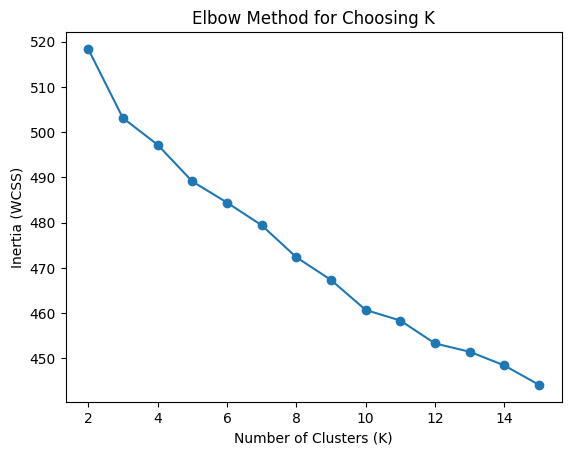

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia_values = []
k_range = range(2, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker="o")
plt.title("Elbow Method for Choosing K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.show()


# Silhouette Score

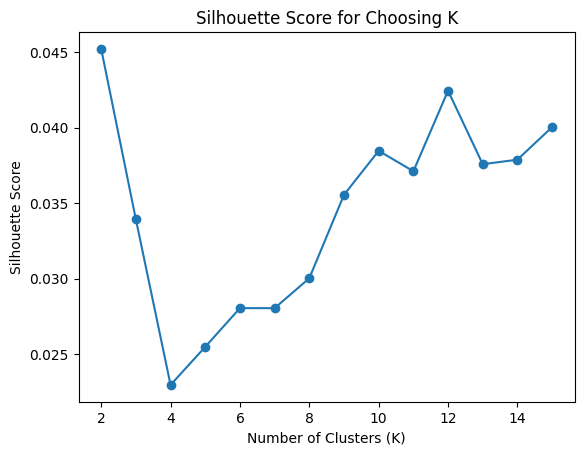

In [12]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker="o")
plt.title("Silhouette Score for Choosing K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()


In [13]:
from sklearn.cluster import KMeans

k = 10

kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

df["cluster"].value_counts()


,count
cluster,
1,166
5,127
8,88
4,62
9,48
6,47
0,39
7,39
2,35


# Cluster Labeling

In [14]:
import numpy as np

def get_top_terms_per_cluster(kmeans_model, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    top_terms = {}

    for i in range(kmeans_model.n_clusters):
        center = kmeans_model.cluster_centers_[i]
        top_indices = center.argsort()[-n_terms:][::-1]
        top_terms[i] = [terms[ind] for ind in top_indices]

    return top_terms

top_words = get_top_terms_per_cluster(kmeans, vectorizer, n_terms=10)

for cluster_id, words in top_words.items():
    print(f"Cluster {cluster_id}: {words}")


Cluster 0: ['يا', 'من', 'في', 'حضرتك', 'خلال', 'لحضرتك', 'على', 'أو', 'ان', 'بحضرتك']
Cluster 1: ['من', 'حضرتك', 'في', 'انا', 'على', 'خلال', 'لحضرتك', 'أو', 'تمام', 'ممكن']
Cluster 2: ['الأسعار', 'في', 'الشحن', 'حضرتك', 'من', 'على', 'خلال', 'خطة', 'أو', 'خطة الأسعار']
Cluster 3: ['فى', 'انا', 'جدا', 'ديما', 'اى', 'مش', 'على', 'لو', 'فى اى', 'حضرتك']
Cluster 4: ['في', 'من', 'على', 'حضرتك', 'خلال', 'إذا', 'أو', 'اضغط', 'اضغط على', 'بوسطة']
Cluster 5: ['في', 'من', 'حضرتك', 'الشحنة', 'إذا', 'بوسطة', 'هنا', 'أو', 'أي', 'أنا']
Cluster 6: ['من', 'في', 'على', 'حضرتك', 'طلب', 'أو', 'إنشاء', 'التغليف', 'خلال', 'استلام']
Cluster 7: ['الخط الساخن', 'الخط', 'الساخن', 'في', 'شغال', 'الساخن لبوسطة', 'على شغال', 'مع الخط', 'لبوسطة على', 'شغال يوميا']
Cluster 8: ['في', 'من', 'على', 'خلال', 'أو', 'حضرتك', 'إذا', 'بوسطة', 'كنت', 'إذا كنت']
Cluster 9: ['الشحنة', 'في', 'tracking', 'eg tracking', 'tracking shipments', 'shipment number', 'shipments shipment', 'shipments', 'shipment', 'number']


# Remove Arabic Stopwords + Custom Stopwords For Feature Extraction (TF-IDF) Again

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Arabic stopwords
arabic_stopwords = [
    "في", "من", "على", "الى", "إلى", "عن", "او", "أو", "ثم", "هل", "ما", "ماذا",
    "انا", "أانا", "انت", "أنت", "هو", "هي", "هم", "نحن", "كان", "كانت",
    "هذا", "هذه", "ذلك", "تلك", "هناك", "هنا", "الذي", "التي",
    "مع", "بدون", "كل", "أي", "اي", "اذا", "إذا", "لدي", "عند", "عندي",
    "حضرتك", "لحضرتك", "بحضرتك", "يا", "تمام", "ممكن", "لو", "جدا", "شكرًا", "شكرا",
    "بوسطة", "بس", "كده", "دي", "ده", "دا"
]

# TF-IDF with stopwords removal
vectorizer = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2),
    stop_words=arabic_stopwords
)

X = vectorizer.fit_transform(df["clean_text"])
print(X.shape)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['شكر'] not in stop_words.
  warnings.warn(


(678, 3000)


In [ ]:
from sklearn.cluster import KMeans

k = 10

kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

df["cluster"].value_counts()


,count
cluster,
2,138
6,112
1,103
3,65
0,64
5,50
4,48
9,38
7,32


In [17]:
import numpy as np

def get_top_terms_per_cluster(kmeans_model, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    top_terms = {}

    for i in range(kmeans_model.n_clusters):
        center = kmeans_model.cluster_centers_[i]
        top_indices = center.argsort()[-n_terms:][::-1]
        top_terms[i] = [terms[ind] for ind in top_indices]

    return top_terms

top_words = get_top_terms_per_cluster(kmeans, vectorizer, n_terms=10)

for cluster_id, words in top_words.items():
    print(f"Cluster {cluster_id}: {words}")


Cluster 0: ['ان', 'خلال', 'شاء', 'شاء الله', 'علي', 'الله', 'الشحنة', 'ان شاء', 'جد', 'الشحنه']
Cluster 1: ['أنا', 'you', 'أساعدك', 'لديك', 'متصل', 'مازلت متصل', 'مازلت', 'علشان', 'the', 'موجود']
Cluster 2: ['خلال', 'اللي', 'كنت', 'اضغط', 'راضي', 'تم', 'المحادثة', 'واختار', 'أنا', 'اليوم']
Cluster 3: ['خلال', 'اضغط', 'اللي', 'متواجدون', 'تقييمك يساعدنا', 'متواجدون طوال', 'يساعدنا', 'يساعدنا نحس', 'لكننا', 'لكننا متواجدون']
Cluster 4: ['الشحنة', 'العميل', 'المندوب', 'الطلب', 'التوصيل', 'أن', 'حتى', 'التسليم', 'رقم', 'الساعة']
Cluster 5: ['الشحنة', 'tracking', 'shipments shipment', 'tracking shipments', 'shipment number', 'eg tracking', 'shipments', 'shipment', 'number', 'رقم']
Cluster 6: ['خلال', 'يافندم', 'اللي', 'ان', 'المندوب', 'أتمنى', 'علي', 'مش', 'قدرت أساعدك', 'أساعدك']
Cluster 7: ['الأسعار', 'الخط الساخن', 'الخط', 'الساخن', 'شغال', 'لبوسطة', 'الساخن لبوسطة', 'لبوسطة شغال', 'شغال يوميا', 'تتواصل الخط']
Cluster 8: ['فى', 'ديما', 'اى', 'مش', 'فى اى', 'مقدر', 'بإذن الله', 'بإذن', 'ي

In [18]:
from sklearn.cluster import KMeans

k = 12

kmeans = KMeans(n_clusters=k, random_state=42)
df["cluster"] = kmeans.fit_predict(X)

df["cluster"].value_counts()


,count
cluster,
2,124
1,91
10,73
3,64
11,60
6,54
5,51
4,50
9,35


In [19]:
import numpy as np

def get_top_terms_per_cluster(kmeans_model, vectorizer, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    top_terms = {}

    for i in range(kmeans_model.n_clusters):
        center = kmeans_model.cluster_centers_[i]
        top_indices = center.argsort()[-n_terms:][::-1]
        top_terms[i] = [terms[ind] for ind in top_indices]

    return top_terms

top_words = get_top_terms_per_cluster(kmeans, vectorizer, n_terms=10)

for cluster_id, words in top_words.items():
    print(f"Cluster {cluster_id}: {words}")


Cluster 0: ['التغليف', 'مواد', 'مواد التغليف', 'الفلايرز', 'لكل', 'فلاير', 'الضغط', 'لكل طلب', 'الأقصى', 'تأكيد الطلب']
Cluster 1: ['أنا', 'you', 'أساعدك', 'متصل', 'مازلت متصل', 'the', 'مازلت', 'لديك', 'علشان', 'موجود']
Cluster 2: ['خلال', 'اللي', 'كنت', 'اضغط', 'راضي', 'تم', 'المحادثة', 'واختار', 'أنا', 'اليوم']
Cluster 3: ['خلال', 'اضغط', 'اللي', 'متواجدون طوال', 'يساعدنا', 'لكننا متواجدون', 'طوال اليوم', 'طوال', 'دقيقتين لكننا', 'لكننا']
Cluster 4: ['الشحنة', 'العميل', 'أن', 'التوصيل', 'حتى', 'المندوب', 'الطلب', 'رقم', 'التسليم', 'الساعة']
Cluster 5: ['الشحنة', 'tracking', 'رقم', 'shipments shipment', 'tracking shipments', 'eg tracking', 'shipment number', 'shipments', 'shipment', 'number']
Cluster 6: ['خلال', 'أتمنى', 'يافندم', 'قدرت أساعدك', 'المندوب', 'أساعدك', 'قدرت', 'أكون', 'أتمنى أكون', 'أكون قدرت']
Cluster 7: ['الأسعار', 'الخط الساخن', 'الخط', 'الساخن', 'شغال', 'لبوسطة', 'الساخن لبوسطة', 'لبوسطة شغال', 'شغال يوميا', 'تتواصل الخط']
Cluster 8: ['فى', 'ديما', 'اى', 'مش', 'فى اى

# Summary
| Cluster | Count | Suggested Label                        | Type            |
| ------- | ----- | -------------------------------------- | --------------- |
| 0       | 18    | Packaging Materials Inquiry            | Customer Intent |
| 1       | 91    | Bot Idle / Connection Check            | Bot Template    |
| 2       | 124   | App Navigation / How-To                | Customer Intent |
| 3       | 64    | Closing / Feedback Request             | Bot Template    |
| 4       | 50    | Delivery Issue / Courier Problem       | Customer Intent |
| 5       | 51    | Shipment Tracking                      | Customer Intent |
| 6       | 54    | Resolution Message / Courier Follow-up | Mixed           |
| 7       | 31    | Pricing + Hotline Inquiry              | Customer Intent |
| 8       | 27    | General Complaint / Unclear            | Noisy Intent    |
| 9       | 35    | Escalation / Support Handling          | Support Action  |
| 10      | 73    | Delivery Complaint                     | Customer Intent |
| 11      | 60    | Escalation to Specialist (Handoff)     | Support Action  |


#Detect Handoff (Bot → Manual Agent)

In [21]:
def detect_handoff(text):
    # Keywords that indicate a human agent joined
    handoff_keywords = [
        "معاك", "من خدمة العملاء", "موظف", "تم تحويلك",
        "تم تحويل", "هكمل معاك", "ممثلة خدمة العملاء"
    ]

    for kw in handoff_keywords:
        if kw in text:
            return 1

    return 0

df["handoff_detected"] = df["clean_text"].apply(detect_handoff)

df["handoff_detected"].value_counts()


,count
handoff_detected,
1,487
0,191


# Sentiment Analysis (Positive / Neutral / Negative)

In [22]:
def sentiment_score(text):
    positive_words = ["شكرا", "تمام", "كويس", "ممتاز", "حلو"]
    negative_words = ["مشكلة", "مش شغال", "زعلان", "سيء", "مش راضي", "ضروري", "مستعجل"]

    score = 0

    for w in positive_words:
        if w in text:
            score += 1

    for w in negative_words:
        if w in text:
            score -= 1

    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_text"].apply(sentiment_score)

df["sentiment"].value_counts()


,count
sentiment,
Positive,357
Neutral,242
Negative,79


# Urgency Detection (Low / Medium / High)

In [23]:
def detect_urgency(text):
    high_keywords = ["ضروري", "حالاً", "دلوقتي", "مستعجل", "مش عارف", "مهم"]
    medium_keywords = ["عايز", "محتاج", "مش فاهم", "ممكن"]

    for kw in high_keywords:
        if kw in text:
            return "High"

    for kw in medium_keywords:
        if kw in text:
            return "Medium"

    return "Low"

df["urgency"] = df["clean_text"].apply(detect_urgency)

df["urgency"].value_counts()


,count
urgency,
Medium,471
High,153
Low,54


# Quality of Handling

In [24]:
def handling_quality(text):
    resolved_signals = ["شكرا", "تمام", "لا شكرا", "متشكر"]
    unresolved_signals = ["مش عارف", "مشكلة", "لسه", "مش شغال", "مش فاهم"]

    resolved = any(sig in text for sig in resolved_signals)
    unresolved = any(sig in text for sig in unresolved_signals)

    if resolved and not unresolved:
        return "Resolved"
    elif unresolved:
        return "Unresolved"
    else:
        return "Unknown"

df["handling_quality"] = df["clean_text"].apply(handling_quality)

df["handling_quality"].value_counts()


,count
handling_quality,
Unresolved,336
Resolved,179
Unknown,163


# Visualization

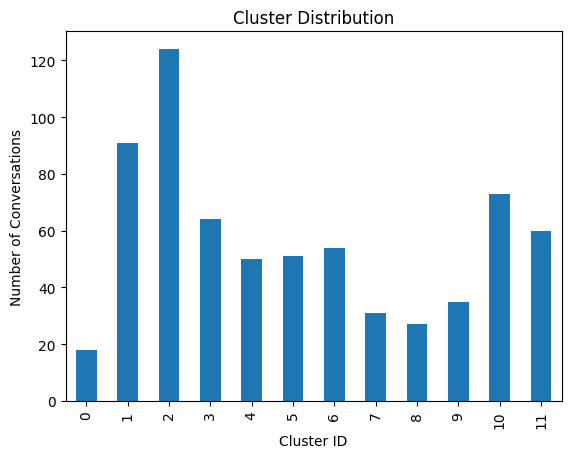

In [25]:
import matplotlib.pyplot as plt

df["cluster"].value_counts().sort_index().plot(kind="bar")
plt.title("Cluster Distribution")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Conversations")
plt.show()


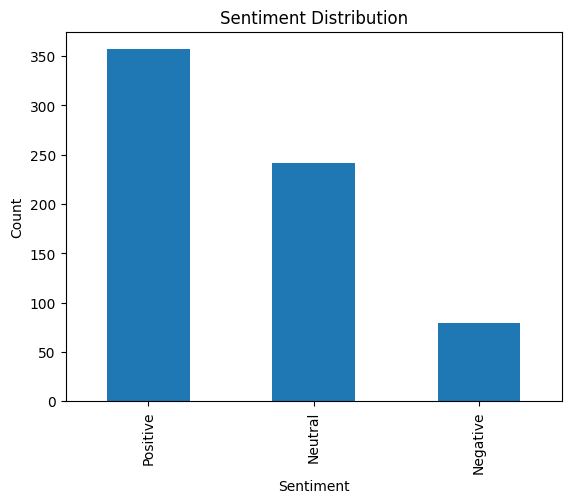

In [26]:
df["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


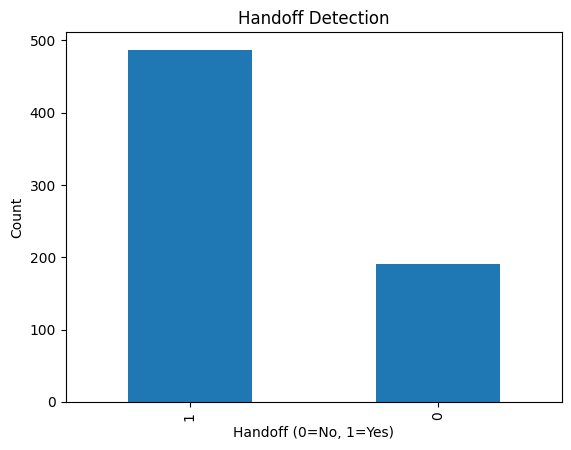

In [27]:
df["handoff_detected"].value_counts().plot(kind="bar")
plt.title("Handoff Detection")
plt.xlabel("Handoff (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()
